In [1]:
from datetime import *
from gmplot import gmplot
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
stations = pd.read_csv("austin-bike/austin_bikeshare_stations.csv")
trips = pd.read_csv("austin-bike/austin_bikeshare_trips.csv")
trips[:5]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
#transfer time into datetime
trips["start_time"] = trips["start_time"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
trips["hours"] = trips["start_time"].map(lambda x : x.hour)
trips["weekday"] = trips["start_time"].map(lambda x : x.isoweekday())

In [5]:
freq_m_year = trips.groupby(["year", "subscriber_type"])["subscriber_type"].count()

s_2014 = pd.Series(freq_m_year.loc[2014.0].sort_values(ascending = False)[:5])
s_2015  = pd.Series(freq_m_year.loc[2015.0].sort_values(ascending = False)[:5])
s_2016  = pd.Series(freq_m_year.loc[2016.0].sort_values(ascending = False)[:5])
s_sum = [sum(freq_m_year.loc[2014.0]), sum(freq_m_year.loc[2015.0]), sum(freq_m_year.loc[2016.0])]


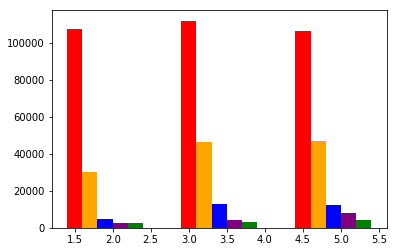

In [6]:
ind = np.array([1.5, 3.0, 4.5])
ind

width = 0.2       # the width of the bars
fig, ax = plt.subplots()
cc= ["red", "orange", "blue", "purple", "green"]
for i in range(5):
    rects1 = ax.bar(ind + width*i,[s_2014[i], s_2015[i], s_2016[i]] , width, color= cc[i])

In [7]:
s_2014.index = ["24-Hour Kiosk", "Annual_M", "Walk Up", "7-Day_M", "Founding_M"]
s_2016.index = ["Walk Up", "Local365", "Local30", "Weekender", "Local365_$80"]

In [32]:
def autolabel(ax, rects, year_sum):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        percentage = round(height/float(year_sum),2)
        ax.text(rect.get_x() + rect.get_width()/2., 1.015*height,
                '%0.2f'% percentage,
                ha='center', va='bottom')




In [53]:
cc_2014 = ["c", "navy", "seagreen", "grey", "red"]
cc_2015 = ["seagreen","steelblue" ,"orange" , "yellowgreen", "grey"]
cc_2016 = ["seagreen", "steelblue","orange" , "yellowgreen", "purple"]

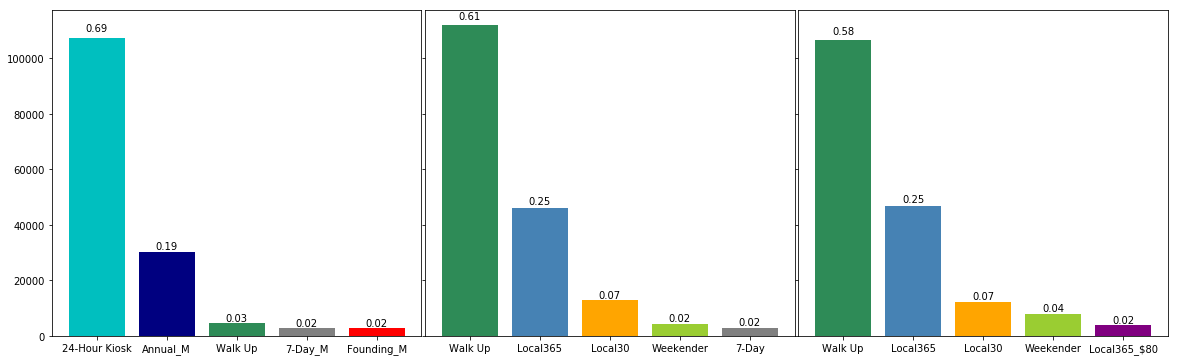

In [81]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                #sharex=True,
                                sharey=True,
                                figsize=(20, 6))
p1 = ax1.bar(s_2014.index.values, s_2014, color = cc_2014)
p2 = ax2.bar(s_2015.index.values, s_2015, color = cc_2015)
p3 = ax3.bar(s_2016.index.values, s_2016, color = cc_2016)
plt.subplots_adjust(wspace =0.01, hspace =0)
autolabel(ax1, p1, s_sum[0])
autolabel(ax2, p2, s_sum[1])
autolabel(ax3, p3, s_sum[2])
savefig("membersplot.png")

In [29]:
s_2014

24-Hour Kiosk    107376
Annual_M          30234
Walk Up            4644
7-Day_M            2747
Founding_M         2716
Name: subscriber_type, dtype: int64

In [63]:
active_groups_s = [ "Walk Up","Local365", "Local30", "Weekender",  "Explorer"]
end = datetime.datetime.strptime("2017", "%Y")
start = datetime.datetime.strptime("2014", "%Y")
trips_t_control = trips[(trips["start_time"] > start) & (trips["start_time"] < end)]
active_groups_mask = trips_t_control["subscriber_type"].map(lambda x : x in active_groups_s)

frequent_m_month = trips_t_control[active_groups_mask].groupby(["subscriber_type", "month"])["subscriber_type"].count()

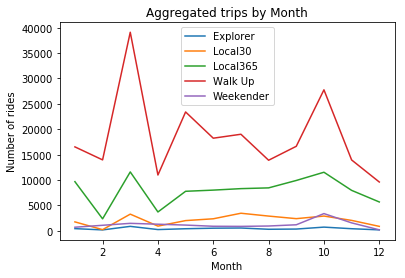

In [64]:
plot (frequent_m_month.loc["Explorer"], marker='None', linestyle='-', label='Explorer')
plot (frequent_m_month.loc["Local30"], marker='None', linestyle='-', label='Local30')
plot (frequent_m_month.loc["Local365"], marker='None', linestyle='-', label='Local365')
plot (frequent_m_month.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up')
plot (frequent_m_month.loc["Weekender"], marker='None', linestyle='-', label='Weekender')
xlabel('Month')
ylabel('Number of rides')
title("Aggregated trips by Month")
legend(loc='best')
show()

In [75]:
def plot_lines(df, subplots, title, xlabel, ylabel):
   '''Generates one or more line plots from pandas dataframe'''

   fig, ax = subplots
   ax = df.plot.line(ax=ax)
   ax.set_xlabel(xlabel, fontdict={'size' : 14})
   ax.set_ylabel(ylabel, fontdict={'size' : 14})
   ax.set_title(title, fontdict={'size' : 18})
   ttl = ax.title
   ttl.set_position([.5, 1.02])
   ax.tick_params(axis='x', labelsize=14)
   ax.tick_params(axis='y', labelsize=14)


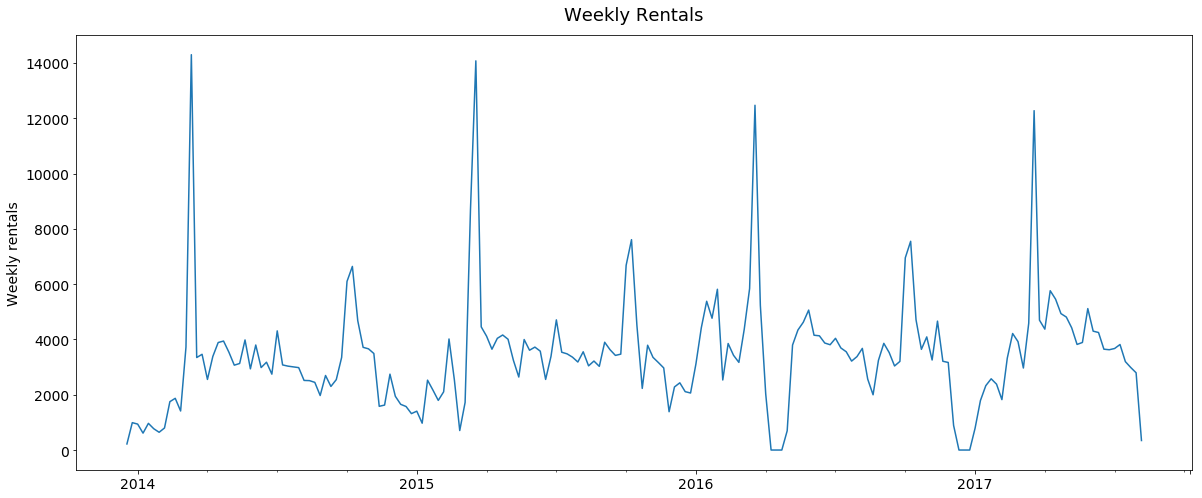

In [82]:
plot_week_df = trips.set_index("start_time")
plot_week_df.resample('W').size().head()
plot_lines(plot_week_df.resample('W').size(), plt.subplots(1,1, figsize=(20,8)),
              title='Weekly Rentals', xlabel='', ylabel='Weekly rentals')
savefig("WeeklyRentalplot.png")

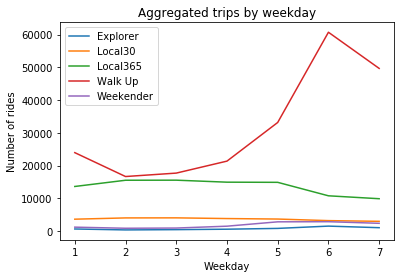

In [61]:
frequent_m_weekday = trips_t_control[active_groups_mask].groupby(["subscriber_type", "weekday"])["subscriber_type"].count()
plot (frequent_m_weekday.loc["Explorer"], marker='None', linestyle='-', label='Explorer')
plot (frequent_m_weekday.loc["Local30"], marker='None', linestyle='-', label='Local30')
plot (frequent_m_weekday.loc["Local365"], marker='None', linestyle='-', label='Local365')
plot (frequent_m_weekday.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up')
plot (frequent_m_weekday.loc["Weekender"], marker='None', linestyle='-', label='Weekender')
xlabel('Weekday')
ylabel('Number of rides')
title("Aggregated trips by weekday")
legend(loc='best')
show()

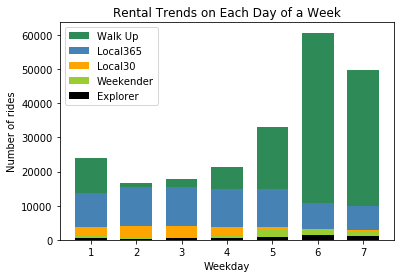

In [83]:
fig, ax = plt.subplots()
active_groups_s

cc= ["seagreen", "steelblue" , "orange","yellowgreen", "black",]
for i in range(len(active_groups_s)):
    ax.bar( frequent_m_weekday.loc[active_groups_s[i]].index.values, 
            frequent_m_weekday.loc[active_groups_s[i]] , 
                                0.7, color = cc[i] , label = active_groups_s[i])

title("Rental Trends on Each Day of a Week")
ylabel('Number of rides')
xlabel("Weekday")
legend()
savefig("BarplotByWeek.png")

In [ ]:
"seagreen", "steelblue" , "orange","yellowgreen", "black",

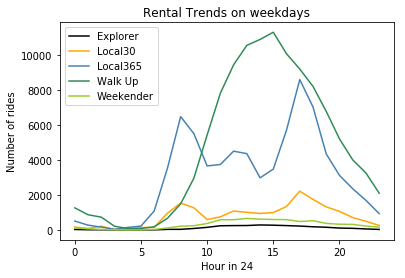

<Figure size 432x288 with 0 Axes>

In [84]:
frequent_m_hour = trips_t_control[active_groups_mask & (trips_t_control["weekday"] <6)].groupby(["subscriber_type", "hours"])["subscriber_type"].count()
plot (frequent_m_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")
plot (frequent_m_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (frequent_m_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (frequent_m_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (frequent_m_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
xlabel('Hour in 24')
ylabel('Number of rides')
title("Rental Trends on weekdays")
legend(loc='best')
show()
savefig("Daily_Rental_Trend(Weekdays).png")

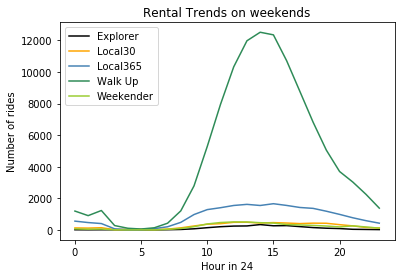

<Figure size 432x288 with 0 Axes>

In [85]:
frequent_m_hour = trips_t_control[active_groups_mask & (trips_t_control["weekday"] >= 6)].groupby(["subscriber_type", "hours"])["subscriber_type"].count()
plot (frequent_m_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")
plot (frequent_m_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (frequent_m_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (frequent_m_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (frequent_m_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
xlabel('Hour in 24')
ylabel('Number of rides')
title("Rental Trends on weekends")
legend(loc='best')
show()
savefig("Daily_Rental_Trend(Weekends).png")